In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time

In [2]:
X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

In [3]:
class Kmeans :
    def __init__(self, n_clusters, batch_percent) :
        self.n_clusters = n_clusters
        self.batch_percent = batch_percent

    def fit_Batch(self, X):

        m, n = X.shape
        #1. randomly choose n clusters from X
        #you can also randomly generate any two points
        rng = np.random.RandomState(42)
        i = rng.permutation(m)[:self.n_clusters]
        centers = X[i]

        iteration = 0

        while True:
            labels = pairwise_distances_argmin(X, centers)
            #3. find new centers
            new_centers = []
            for i in range(self.n_clusters):
                new_centers.append(X[labels == i].mean(axis=0))

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)

            if(np.allclose(centers, new_centers)):
                break
            else:
                centers = new_centers
                iteration+=1
        print(f"Done in {iteration} iterations")
        self.centers = centers

    def fit_MB(self, X) :
        m, n = X.shape
        batch_size = int(X.shape[0] * self.batch_percent)
        #1. randomly choose n clusters from X
        #you can also randomly generate any two points
        rng = np.random.RandomState(42)
        i = rng.permutation(m)[:self.n_clusters]
        centers = X[i]

        iteration = 0

        while True:
            #2. assign lables based on closest center
            #return the index of centers having smallest
            #distance with X
            batch_x = np.random.randint(0, X.shape[0] - self.n_clusters) #we can't have batch_size with smaller than the number of clusters
            X_batch = X[batch_x:batch_x + batch_size]
            labels = pairwise_distances_argmin(X_batch, centers)
            #3. find new centers
            new_centers = []
            for i in range(self.n_clusters):
                if X_batch[labels == i].shape[0] == 0 :
                    new_centers.append([np.nan, np.nan])
                else :
                    new_centers.append(X_batch[labels == i].mean(axis=0))

            new_centers = np.array(new_centers)

            if(np.allclose(centers, new_centers, rtol = 1e-2, atol = 1e-5)):
                break
            else:
              #if there is one center which is not defined with the batch, we don't update
                if new_centers[np.isnan(new_centers)].shape[0] == 0 :
                    centers = new_centers
                iteration+=1
                if iteration > 20 :
                    print(f"Done in {iteration} iterations")
                    self.centers = centers 
                    break
        #print(f"Done in {iteration} iterations")
        self.centers = centers

    def fit(self, X):
        if self.batch_percent == 1.0:
            self.fit_Batch(X)
        else :
            self.fit_MB(X)

    def within_cluster_variance(self, X) :
        n_centers = self.centers.shape[0]
        yhat = self.predict(X)
        variance = np.zeros((n_centers, 1))
        for k in range(n_centers):
            variance[k] = np.sum((X[yhat == k] - self.centers[k])**2)
        return np.sum(variance)

    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)


Done in 14 iterations
Fit and predict time: 0.018968820571899414


Text(0.5, 1.0, 'Final result')

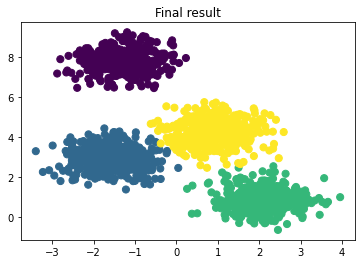

In [4]:
start = time()
exp = Kmeans(4, 1)
exp.fit(X)
preds = exp.predict(X)
print(f"Fit and predict time: {time() - start}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

Done in 21 iterations
Fit and predict time: 0.01689767837524414


Text(0.5, 1.0, 'Final result')

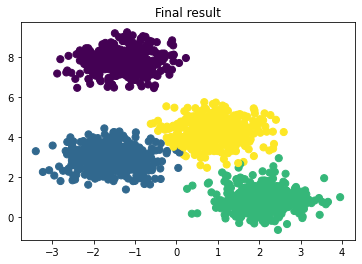

In [5]:
start = time()
exp = Kmeans(4, 0.2)
exp.fit(X)
preds = exp.predict(X)
print(f"Fit and predict time: {time() - start}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

Done in 4 iterations
Done in 10 iterations
Done in 14 iterations
Done in 7 iterations
Done in 15 iterations
Done in 16 iterations
Done in 16 iterations
Done in 17 iterations


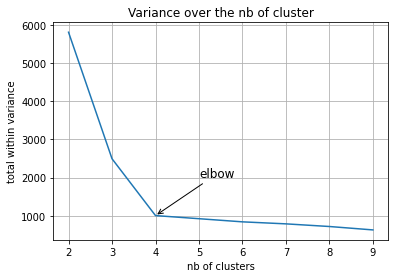

In [6]:
var = []
x_abs = np.arange(2 , 10, step=1)
for k in x_abs:
    exp = Kmeans(k, 1)
    exp.fit(X)
    var.append(exp.within_cluster_variance(X))
plt.plot(x_abs, var)
plt.xlabel('nb of clusters')
plt.ylabel('total within variance')
plt.title('Variance over the nb of cluster')
plt.annotate('elbow', (x_abs[2], var[2]), (5, 2000), arrowprops = dict(arrowstyle = '->'), size = 12)
plt.grid()
plt.show()